# Machine Learning Exercise

During this notebook, the concepts described during the ML lessons will be shown.
Firstly, a Linear Regression example will be presented, then a full approach to the problem of the hand written digits classification will be presented.

## Scikit-learn
Machine Learning in Python

- Simple and efficient tools for data mining and data analysis
- Accessible to everybody, and reusable in various contexts
- Built on NumPy, SciPy, and matplotlib
- Open source, commercially usable

## Linear Regression

Purpose: Find the relation between a set of input variables x and an output variable y, using a linear model

In the first part of the exercise, we're tasked with implementing linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import random as ran
import numpy.random as rnd
%matplotlib inline

In [2]:
import os
path = os.getcwd() + '\data\ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.tail()

,Population,Profit
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


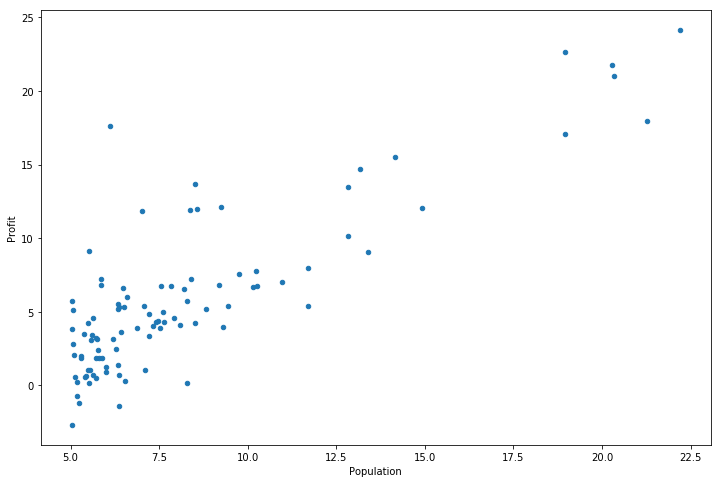

In [5]:
# Let's plot the data
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

In [6]:
# Now let's use the linear regression model of scikit-learn
from sklearn import linear_model

cols = data.shape[1]

X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

model = linear_model.LinearRegression()

model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

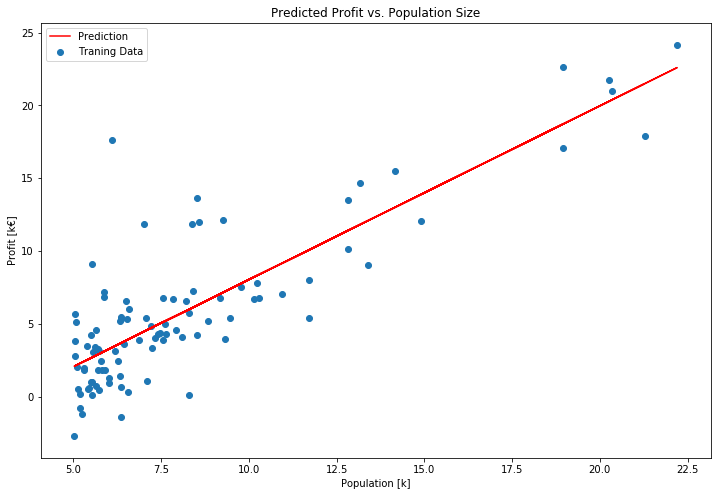

In [7]:
# Let's plot the fit
x = np.array(X)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population [k]')
ax.set_ylabel('Profit [k€]')
ax.set_title('Predicted Profit vs. Population Size')

In [8]:
# The coefficients
display("Coefficients:", model.coef_[0][0])
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((model.predict(X) - y) ** 2))

'Coefficients:'

1.1930336441895939

Mean squared error: 8.95


In [9]:
model.predict(50)

array([[ 55.75590133]])

## Handwritten digits problem

The problem of identifiying the handwritten number, for a PC is not trivial.
It is necessary to introduce some artificial intelligence.
To test our algorithms, some databases of images are available online. The most famous is the MNIST dataset (http://yann.lecun.com/exdb/mnist/). 

It is composed by 28x28 images representing handwritten numbers. The dataset is composed by the images and the label associated to them.

The training set is composed by 60000 examples, the test set of 10000 examples. The digits have been size-normalized and centered in a fixed-size image.

For the analysis TensorFlow will be used.

TensorFlow™ is an open source software library for numerical computation using data flow graphs. Nodes in the graph represent mathematical operations, while the graph edges represent the multidimensional data arrays (tensors) communicated between them. The flexible architecture allows you to deploy computation to one or more CPUs or GPUs in a desktop, server, or mobile device with a single API. TensorFlow was originally developed by researchers and engineers working on the Google Brain Team within Google's Machine Intelligence research organization (https://www.tensorflow.org/)

In [10]:
#import the MNIST dataset exploiting the tensorflow framework
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [11]:
# Define some useful functions
def display_digit(num):
    #print(y_train[num])
    label = y_train[num]
    image = x_train[num].reshape([28,28])
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    #plt.show()

def display_mult_flat(start, stop):
    plt.figure(0,figsize=(15, 15))
    images = x_train[start].reshape([1,784])
    for i in range(start+1,stop):
        images = np.concatenate((images, x_train[i].reshape([1,784])))
    plt.imshow(images, cmap=plt.get_cmap('gray_r'))
    plt.show()

In [12]:
# Define some useful functions
def TRAIN_SIZE(num):
    print ('Total Training Images in Dataset = ' + str(mnist.train.images.shape))
    print ('--------------------------------------------------')
    x_train = mnist.train.images[:num,:]
    print ('x_train Examples Loaded = ' + str(x_train.shape))
    y_train = mnist.train.labels[:num,:]
    print ('y_train Examples Loaded = ' + str(y_train.shape))
    print('')
    return x_train, y_train

def TEST_SIZE(num):
    print ('Total Test Examples in Dataset = ' + str(mnist.test.images.shape))
    print ('--------------------------------------------------')
    x_test = mnist.test.images[:num,:]
    print ('x_test Examples Loaded = ' + str(x_test.shape))
    y_test = mnist.test.labels[:num,:]
    print ('y_test Examples Loaded = ' + str(y_test.shape))
    return x_test, y_test

## Data Visualization

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (10000, 784)
y_train Examples Loaded = (10000, 10)

Total Test Examples in Dataset = (10000, 784)
--------------------------------------------------
x_test Examples Loaded = (5000, 784)
y_test Examples Loaded = (5000, 10)


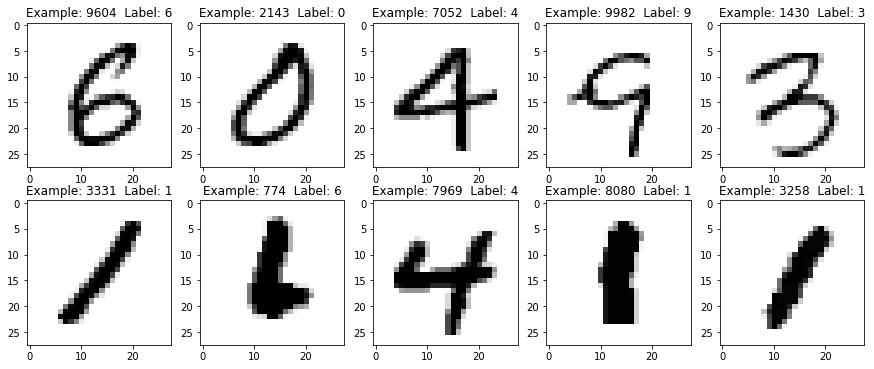

In [13]:
# define the train and the test dataset [foglio] 
x_train, y_train = TRAIN_SIZE(10000)
x_test, y_test = TEST_SIZE(5000)

# redefine the y, avoiding to use the vector representation.
y_train = np.dot(y_train,np.array([[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]]).reshape(10,1))[:,0]
y_test = np.dot(y_test,np.array([[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]]).reshape(10,1))[:,0]

# Plot 10 random images
fig = plt.figure(0,figsize=(15, 6))
plt.subplot(251)
num = ran.randint(0, x_train.shape[0])
plt.imshow(x_train[num].reshape([28,28]), cmap=plt.get_cmap('gray_r'))
plt.title('Example: %d  Label: %d' % (num, y_train[num]))

plt.subplot(252)
num = ran.randint(0, x_train.shape[0])
plt.imshow(x_train[num].reshape([28,28]), cmap=plt.get_cmap('gray_r'))
plt.title('Example: %d  Label: %d' % (num, y_train[num]))

plt.subplot(253)
num = ran.randint(0, x_train.shape[0])
plt.imshow(x_train[num].reshape([28,28]), cmap=plt.get_cmap('gray_r'))
plt.title('Example: %d  Label: %d' % (num, y_train[num]))

plt.subplot(254)
num = ran.randint(0, x_train.shape[0])
plt.imshow(x_train[num].reshape([28,28]), cmap=plt.get_cmap('gray_r'))
plt.title('Example: %d  Label: %d' % (num, y_train[num]))

plt.subplot(255)
num = ran.randint(0, x_train.shape[0])
plt.imshow(x_train[num].reshape([28,28]), cmap=plt.get_cmap('gray_r'))
plt.title('Example: %d  Label: %d' % (num, y_train[num]))

plt.subplot(256)
num = ran.randint(0, x_train.shape[0])
plt.imshow(x_train[num].reshape([28,28]), cmap=plt.get_cmap('gray_r'))
plt.title('Example: %d  Label: %d' % (num, y_train[num]))

plt.subplot(257)
num = ran.randint(0, x_train.shape[0])
plt.imshow(x_train[num].reshape([28,28]), cmap=plt.get_cmap('gray_r'))
plt.title('Example: %d  Label: %d' % (num, y_train[num]))

plt.subplot(258)
num = ran.randint(0, x_train.shape[0])
plt.imshow(x_train[num].reshape([28,28]), cmap=plt.get_cmap('gray_r'))
plt.title('Example: %d  Label: %d' % (num, y_train[num]))

plt.subplot(259)
num = ran.randint(0, x_train.shape[0])
plt.imshow(x_train[num].reshape([28,28]), cmap=plt.get_cmap('gray_r'))
plt.title('Example: %d  Label: %d' % (num, y_train[num]))

plt.subplot(2,5,10)
num = ran.randint(0, x_train.shape[0])
plt.imshow(x_train[num].reshape([28,28]), cmap=plt.get_cmap('gray_r'))
plt.title('Example: %d  Label: %d' % (num, y_train[num]))

plt.show()

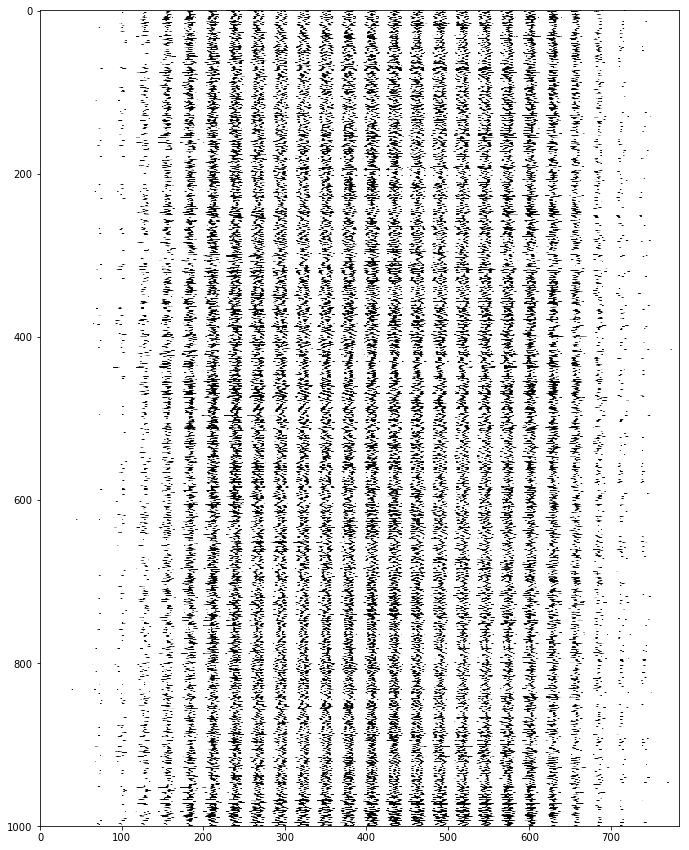

In [14]:
# plot the features on a single row. In this case the plot represents the firsts 1000 number

display_mult_flat(0,1000)

## Logistic regression
In statistics, logistic regression, or logit regression, or logit model is a regression model where the dependent variable (DV) is categorical.

In [15]:
# [time consuming]
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(penalty='l2', C = 1e9, n_jobs = -1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

acc_score = accuracy_score(y_test, y_pred)

print(acc_score)

0.8264


### Logistic regression - Regularization and Cross-Validation
Regularization is the first line of defense against overfitting
![title](eq_reg.JPG)

![title](reg_pic.JPG)

Cross-validation can be used effectively to perform model selection by selecting the
right regularization parameter λ

![title](CV1.JPG)

It is possible to reserve more points for validation by dividing the training set in “folds”

![title](CV2.JPG)

We will start from the previous training set of 10000 points.

The number of features are 28*28 = 784

We decide to use 10 folds, leading to K = N/10 = 1000

So we will train our classificator on N-K = 9000 pictures.

Since it is greeater than 10 * #of_features the problem is well posed.


In [16]:
# [time consuming]
from sklearn.model_selection import GridSearchCV

# the tuned parameters C is the inverse of the regularization parameters
tuned_parameters = [{'C': [0.01, 0.1, 1]}]

clf = GridSearchCV(LogisticRegression(penalty='l2'), tuned_parameters, cv=10,
                       scoring='accuracy',n_jobs = -1)
clf.fit(x_train, y_train)

print("Best parameters set found on training set:")
print(clf.best_params_['C'])
print()

y_pred = clf.predict(x_test)

acc_score = accuracy_score(y_test, y_pred)

print("Accuracy score:")
print(acc_score)

Best parameters set found on training set:
0.1

Accuracy score:
0.8808


[  1.43124364e-05   2.78661149e+01   8.25149378e-01   1.72649820e+00
   5.18090875e+00   3.57728707e+01   7.14593292e-01   7.65870115e-03
   2.75860190e+01   3.20172802e-01]


C:\Users\miche_000\Anaconda2\envs\tensorflow3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


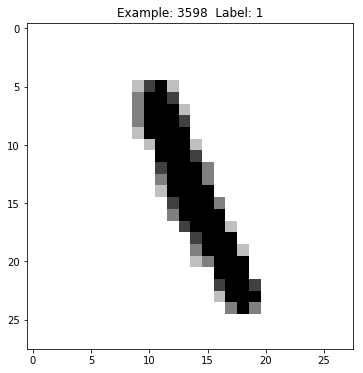

In [17]:
# test an image with predict_proba
fig = plt.figure(0,figsize=(15, 6))

num = ran.randint(0, x_test.shape[0])
plt.imshow(x_test[num].reshape([28,28]), cmap=plt.get_cmap('gray_r'))
plt.title('Example: %d  Label: %d' % (num, y_test[num]))

y_pred = clf.predict_proba(x_test[num])

print(y_pred[0]*100)

## PCA

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components (or sometimes, principal modes of variation).

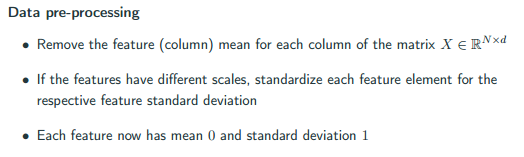

![Title](PCA.JPG)

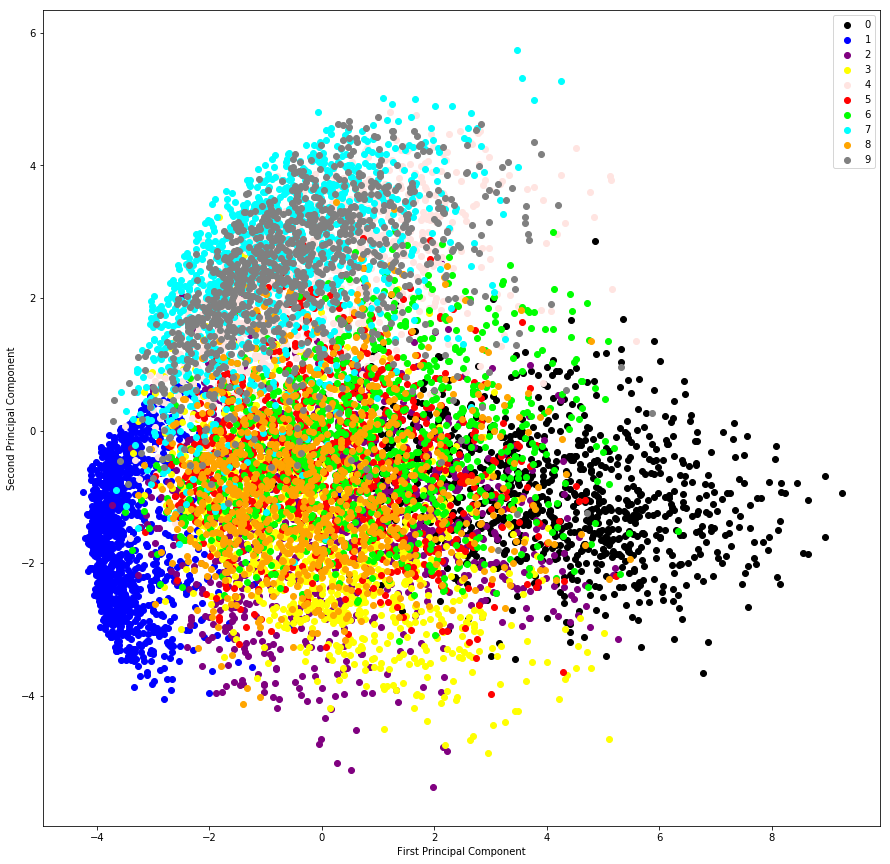

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def plot_pca_scatter():
    plt.figure(0,figsize=(15, 15))
    colors = ['black', 'blue', 'purple', 'yellow', 'mistyrose', 'red', 'lime', 'cyan', 'orange', 'gray']
    for i in range(len(colors)):
        px = X_pca[:, 0][y_train == i]
        py = X_pca[:, 1][y_train == i]
        plt.scatter(px, py, c=colors[i])
    plt.legend(['0','1','2','3','4','5','6','7','8','9'])
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    
# scale the data removing only the mean
X_scaler = StandardScaler(with_std = False)
x_train_red = X_scaler.fit_transform(x_train)

estimator = PCA(n_components=2)
X_pca = estimator.fit_transform(x_train_red)
plot_pca_scatter()


## K-means
k-means clustering is a method of vector quantization, originally from signal processing, that is popular for cluster analysis in data mining. k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. 

![Title](KMEANS.JPG)

In [19]:
from sklearn.cluster import KMeans
n_digits = 10

reduced_data = X_pca

# visualization
# test the K-means with random inizialization and only one inizialization test
kmeans = KMeans(init='random', n_clusters=n_digits, n_init=1,n_jobs = -1)
kmeans.fit(X_pca)
# Inertia = Sum of distances of samples to their closest cluster center.
print("Inertia single-shot")
print(kmeans.inertia_)

# test the K-means with random inizialization and 100 inizialization test
kmeans = KMeans(init='random', n_clusters=n_digits, n_init=100,n_jobs = -1)
kmeans.fit(X_pca)
print("Inertia multiple init")
print(kmeans.inertia_)


Inertia single-shot
10246.9137189
Inertia multiple init
10238.9831447


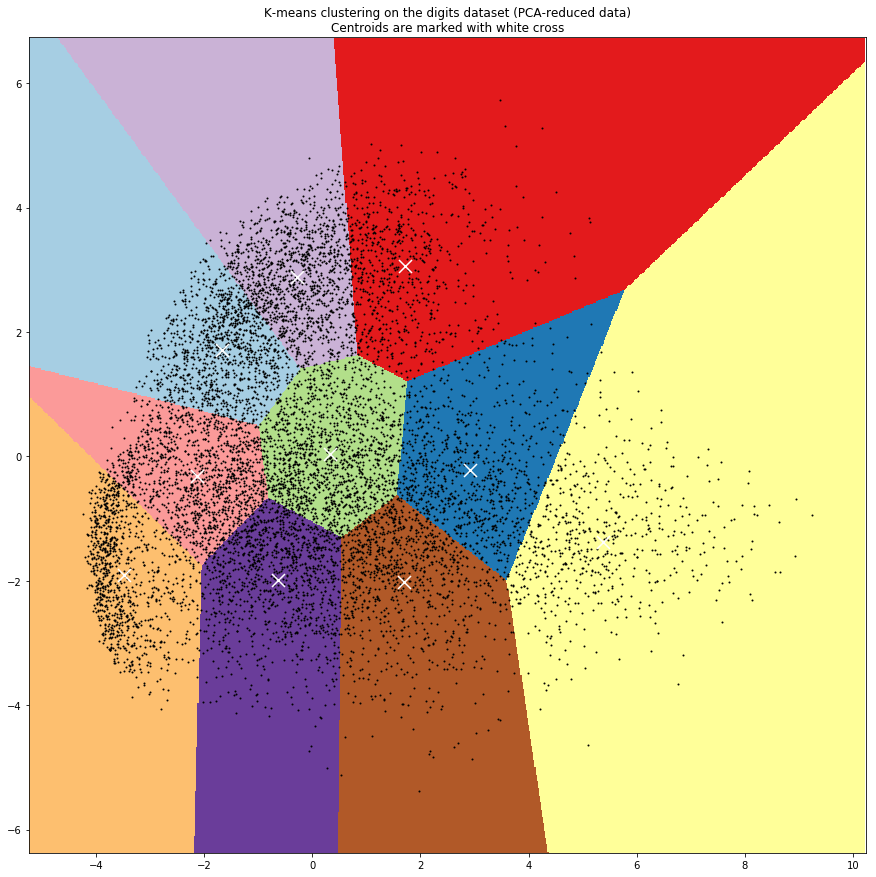

In [20]:
# DATA VISUALIZATION

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1,figsize=(15, 15))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()


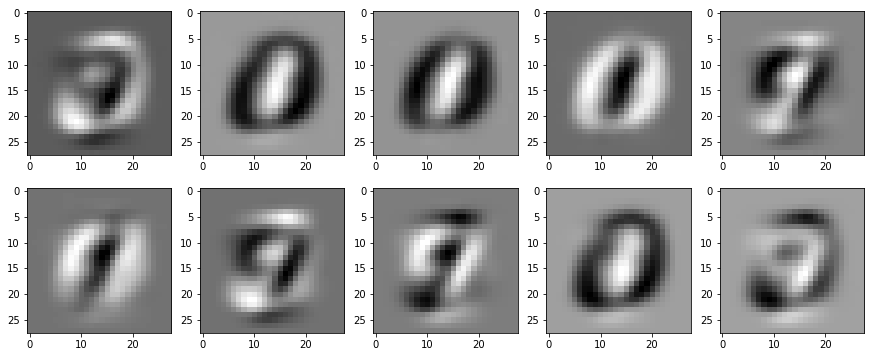

In [21]:
# Let's try to figure out how the centroids are:

centroids = kmeans.cluster_centers_
# moving from the PCA space to the original features space:
centroids_inv = estimator.inverse_transform(centroids, y=None)

plt.figure

fig = plt.figure(0,figsize=(15, 6))
plt.set_cmap('gray_r')
plt.subplot(251)
plt.imshow(centroids_inv[0,:].reshape(28,28))

plt.subplot(252)
plt.imshow(centroids_inv[1,:].reshape(28,28))

plt.subplot(253)
plt.imshow(centroids_inv[2,:].reshape(28,28))

plt.subplot(254)
plt.imshow(centroids_inv[3,:].reshape(28,28))

plt.subplot(255)
plt.imshow(centroids_inv[4,:].reshape(28,28))

plt.subplot(256)
plt.imshow(centroids_inv[5,:].reshape(28,28))

plt.subplot(257)
plt.imshow(centroids_inv[6,:].reshape(28,28))

plt.subplot(258)
plt.imshow(centroids_inv[7,:].reshape(28,28))

plt.subplot(259)
plt.imshow(centroids_inv[8,:].reshape(28,28))

plt.subplot(2,5,10)
plt.imshow(centroids_inv[9,:].reshape(28,28))


In [22]:
# Why the images does not have any meaning?

# --> How much the PCA describes our datasets?
# --> let's take a look at the explained variance
print("Explained variance:")
print(np.sum(estimator.explained_variance_ratio_))



Explained variance:
0.172770744827


In [23]:
# The previous value says that the PCA with only 2 components does not describe our dataset (only 17% of explained variance)
# Let's increase the number of principal components. Obviously this means that the PCA space won't be possible to plot.
estimator = PCA(n_components=25)
X_pca = estimator.fit_transform(x_train_red)

print("Explained variance:")
print(np.sum(estimator.explained_variance_ratio_))

kmeans = KMeans(init='random', n_clusters=n_digits, n_init=100 ,n_jobs = -1)
kmeans.fit(X_pca)

centroids = kmeans.cluster_centers_
# moving from the PCA space to the original features space:
centroids_inv = estimator.inverse_transform(centroids, y=None)

Explained variance:
0.70066746163


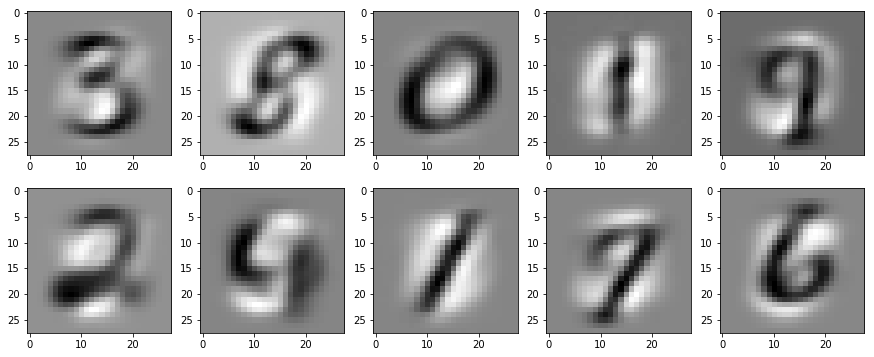

In [24]:
# Centroids Visualization
plt.figure

fig = plt.figure(0,figsize=(15, 6))
plt.set_cmap('gray_r')
plt.subplot(251)
plt.imshow(centroids_inv[0,:].reshape(28,28))

plt.subplot(252)
plt.imshow(centroids_inv[1,:].reshape(28,28))

plt.subplot(253)
plt.imshow(centroids_inv[2,:].reshape(28,28))

plt.subplot(254)
plt.imshow(centroids_inv[3,:].reshape(28,28))

plt.subplot(255)
plt.imshow(centroids_inv[4,:].reshape(28,28))

plt.subplot(256)
plt.imshow(centroids_inv[5,:].reshape(28,28))

plt.subplot(257)
plt.imshow(centroids_inv[6,:].reshape(28,28))

plt.subplot(258)
plt.imshow(centroids_inv[7,:].reshape(28,28))

plt.subplot(259)
plt.imshow(centroids_inv[8,:].reshape(28,28))

plt.subplot(2,5,10)
plt.imshow(centroids_inv[9,:].reshape(28,28))

## How to improve classification performance

### Neural Network - Softmax regression Model
![Title](SOFTMAX.JPG)

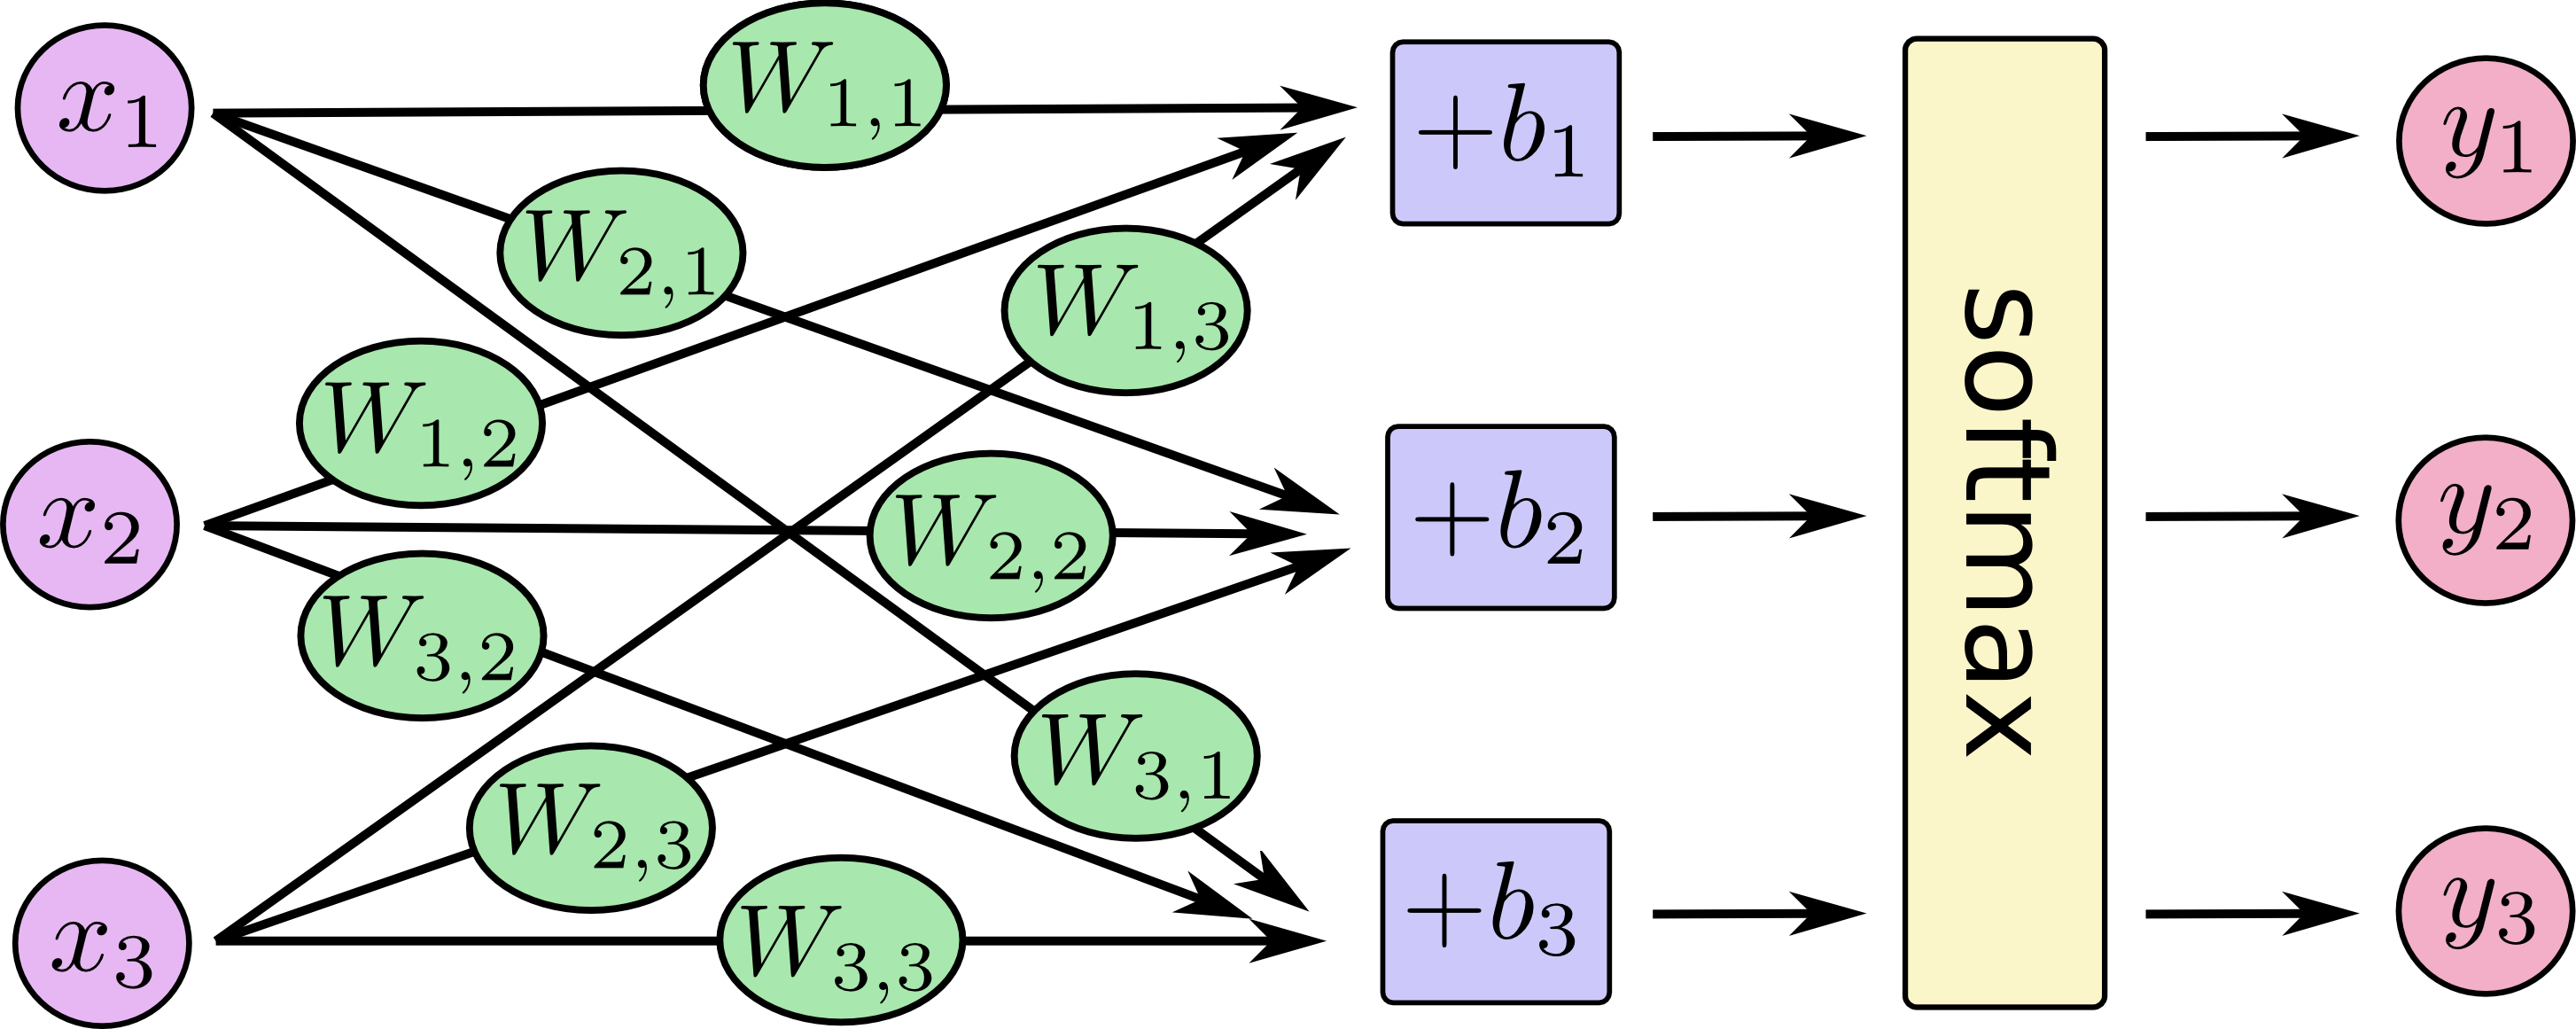



In [25]:
# Load MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [26]:
# Start TensorFlow InteractiveSession [connection to C++ backend]

import tensorflow as tf
sess = tf.InteractiveSession()

In [27]:
# Let's build the graph:
# Use the placeholders for the creation of nodes of input/ouput
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

# The variables are the weights W and biases b of the model.
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

# Inizialize the variables in the session
sess.run(tf.global_variables_initializer())

# Implement the regression model
y = tf.matmul(x,W) + b

# define the loss function as the cross entropy:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

# Train the model
#The returned operation train_step, when run, will apply the gradient descent updates to the parameters. 
#Training the model can therefore be accomplished by repeatedly running train_step.

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
for _ in range(1000):
  batch = mnist.train.next_batch(100)
  train_step.run(feed_dict={x: batch[0], y_: batch[1]})

In [28]:
# Model evaluation
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print("Accuracy on test set:")
print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

Accuracy on test set:
0.9196


## Multilayer Convolutional Network

In [29]:
# Let's define some functions for good initializations (we're using ReLU neurons)
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

#

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [30]:
# Transform the input image to a 4d tensor
x_image = tf.reshape(x, [-1,28,28,1])

In [31]:
# First Convolutional Layer
# Convolution and the Max Pooling
# - Convolution will compute 32 features for each 5x5 patch
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

#we then convolve the image with the weight tensor, add the bias, apply the activaction function (ReLU)
# and finally reduce the size of the image using the max pool
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

In [32]:
# Second Convolutional Layer
# a DEEP NN has several stacked layer of this type
#the 2nd layer will have 64 features for each 5x5 patch

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [33]:
# Densely Connected Layer
# The image is now a 7x7, we create a fully connected layer with 1024 neurons
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])

h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [34]:
# Dropout
# To reduce overfitting, we will apply dropout before the readout layer.

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [35]:
# Redout
# finally a layer just like the softmax regression

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [36]:
# TRAIN AND EVALUATE
# we use ADAM optimizer intstead of GD
# keep_prob in feed dict is a parameter to control droput
# log every 200 iterations
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))

train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(tf.global_variables_initializer())

for i in range(20000):
  batch = mnist.train.next_batch(50)
  if i%200 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    print("step %d, training accuracy %g"%(i, train_accuracy))
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

step 0, training accuracy 0.1
step 200, training accuracy 0.9
step 400, training accuracy 0.92
step 600, training accuracy 0.94
step 800, training accuracy 0.9
step 1000, training accuracy 0.9
step 1200, training accuracy 1
step 1400, training accuracy 0.98
step 1600, training accuracy 1
step 1800, training accuracy 0.94
step 2000, training accuracy 0.96
step 2200, training accuracy 1
step 2400, training accuracy 0.94
step 2600, training accuracy 1
step 2800, training accuracy 1
step 3000, training accuracy 0.98
step 3200, training accuracy 1
step 3400, training accuracy 1
step 3600, training accuracy 1
step 3800, training accuracy 0.98
step 4000, training accuracy 1
step 4200, training accuracy 1
step 4400, training accuracy 1
step 4600, training accuracy 0.96
step 4800, training accuracy 1
step 5000, training accuracy 0.98
step 5200, training accuracy 1
step 5400, training accuracy 1
step 5600, training accuracy 1
step 5800, training accuracy 1
step 6000, training accuracy 1
step 620

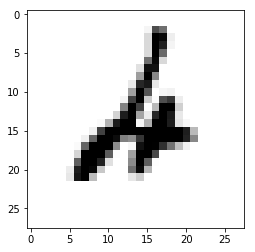

Prediction: 6 Label: 4
------------------------


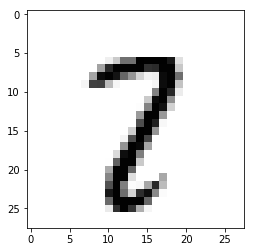

Prediction: 7 Label: 2
------------------------


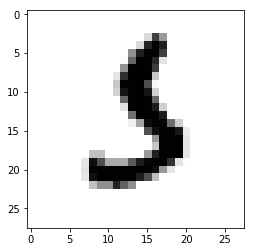

Prediction: 3 Label: 5
------------------------


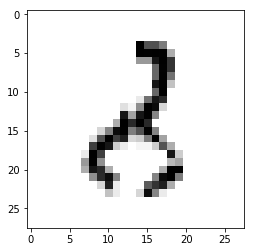

Prediction: 2 Label: 8
------------------------


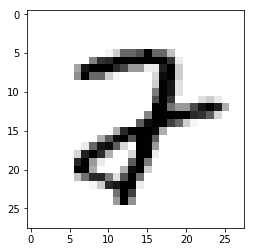

Prediction: 7 Label: 2
------------------------


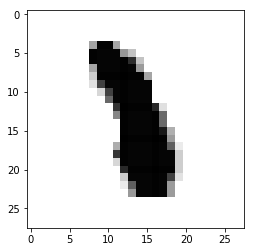

Prediction: 8 Label: 1
------------------------


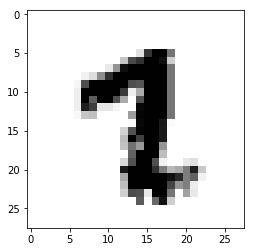

Prediction: 1 Label: 2
------------------------


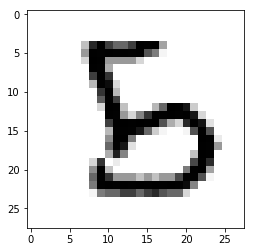

Prediction: 8 Label: 5
------------------------


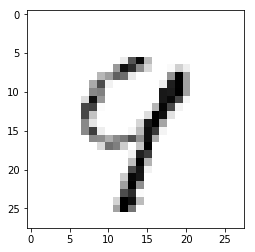

Prediction: 7 Label: 9
------------------------


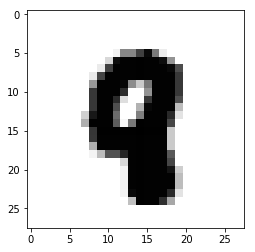

Prediction: 9 Label: 8
------------------------


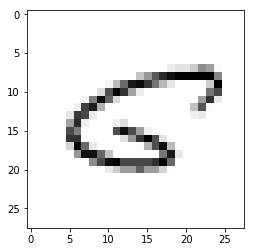

Prediction: 5 Label: 6
------------------------


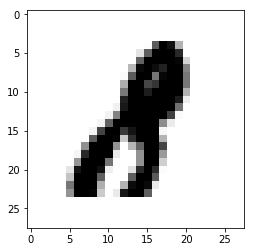

Prediction: 1 Label: 8
------------------------


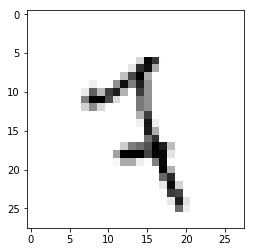

Prediction: 1 Label: 7
------------------------


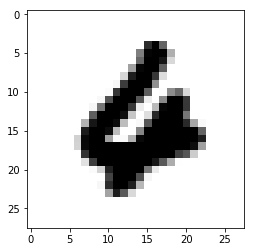

Prediction: 6 Label: 4
------------------------


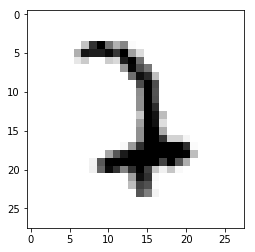

Prediction: 2 Label: 7
------------------------


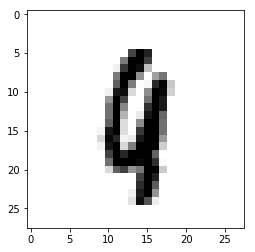

Prediction: 4 Label: 9
------------------------


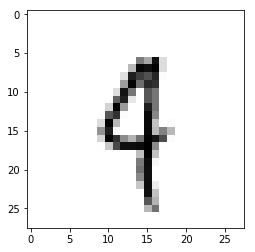

Prediction: 9 Label: 4
------------------------


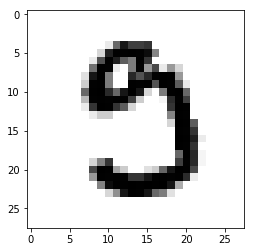

Prediction: 5 Label: 9
------------------------


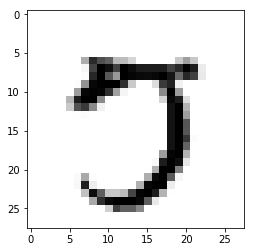

Prediction: 7 Label: 5
------------------------


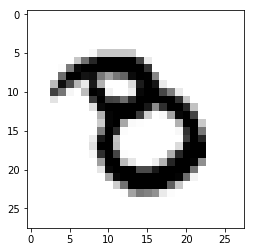

Prediction: 0 Label: 8
------------------------


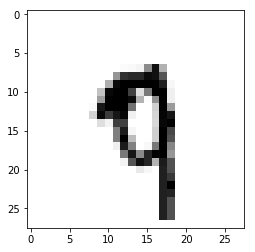

Prediction: 7 Label: 9
------------------------


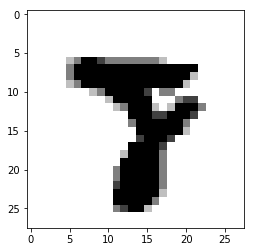

Prediction: 7 Label: 8
------------------------


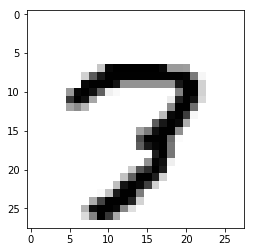

Prediction: 7 Label: 3
------------------------


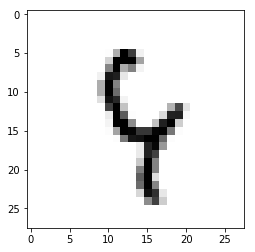

Prediction: 4 Label: 9
------------------------


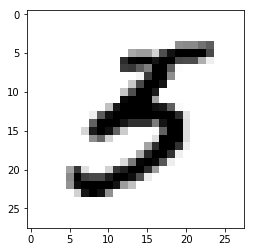

Prediction: 3 Label: 5
------------------------


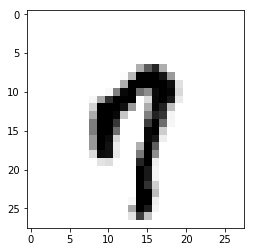

Prediction: 9 Label: 7
------------------------


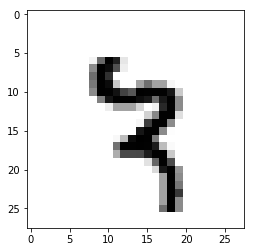

Prediction: 7 Label: 3
------------------------


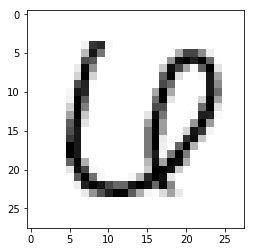

Prediction: 0 Label: 6
------------------------


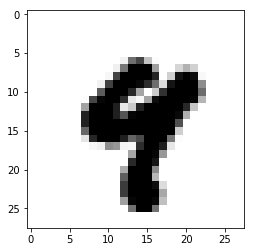

Prediction: 9 Label: 4
------------------------


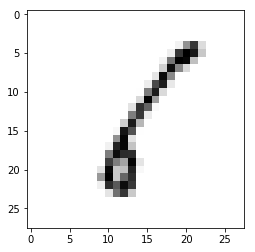

Prediction: 1 Label: 6
------------------------


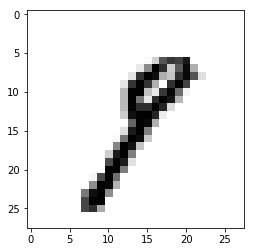

Prediction: 1 Label: 9
------------------------


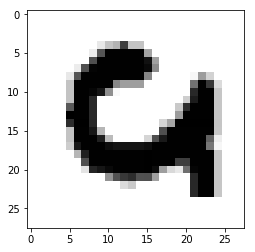

Prediction: 0 Label: 9
------------------------


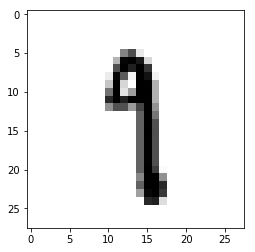

Prediction: 1 Label: 9
------------------------


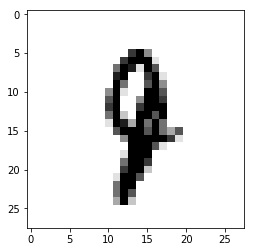

Prediction: 4 Label: 9
------------------------


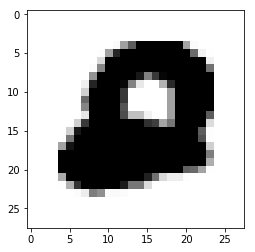

Prediction: 0 Label: 2
------------------------


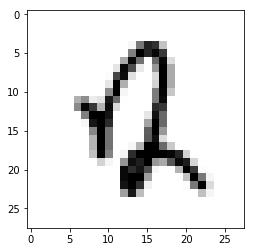

Prediction: 4 Label: 2
------------------------


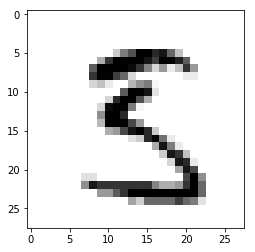

Prediction: 3 Label: 5
------------------------


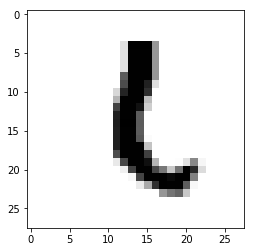

Prediction: 1 Label: 6
------------------------


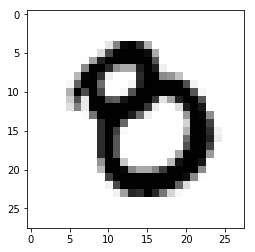

Prediction: 0 Label: 8
------------------------


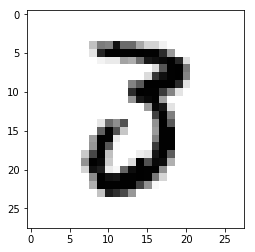

Prediction: 8 Label: 3
------------------------


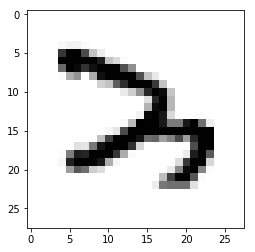

Prediction: 2 Label: 3
------------------------


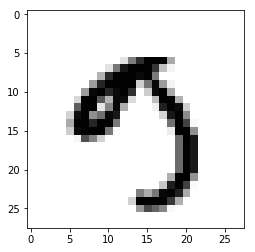

Prediction: 5 Label: 9
------------------------


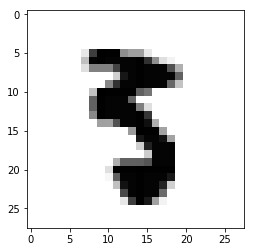

Prediction: 5 Label: 3
------------------------


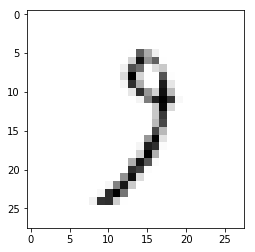

Prediction: 7 Label: 9
------------------------


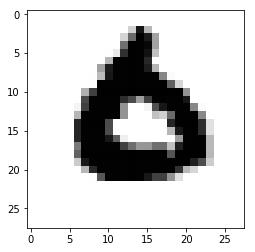

Prediction: 0 Label: 6
------------------------


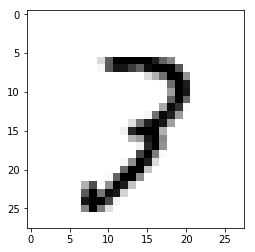

Prediction: 7 Label: 3
------------------------


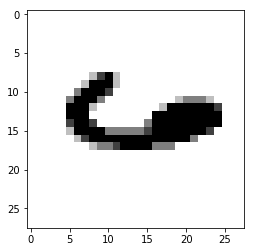

Prediction: 4 Label: 6
------------------------


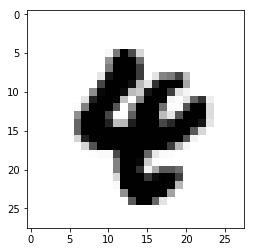

Prediction: 8 Label: 4
------------------------


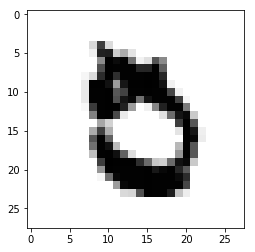

Prediction: 0 Label: 5
------------------------


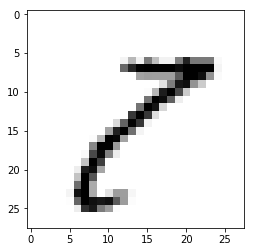

Prediction: 8 Label: 7
------------------------


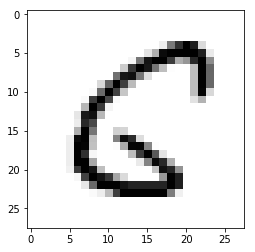

Prediction: 0 Label: 6
------------------------


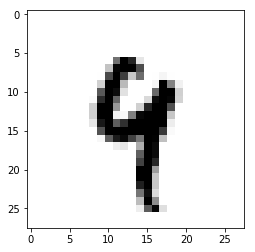

Prediction: 4 Label: 9
------------------------


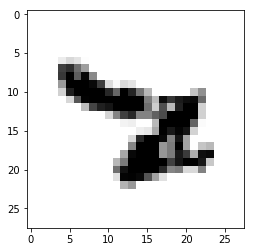

Prediction: 7 Label: 2
------------------------


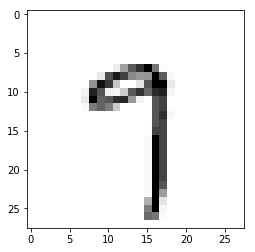

Prediction: 7 Label: 9
------------------------


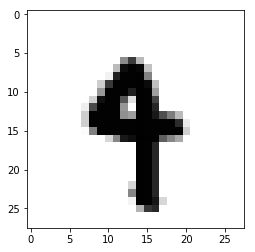

Prediction: 9 Label: 4
------------------------


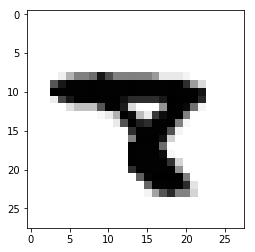

Prediction: 7 Label: 8
------------------------


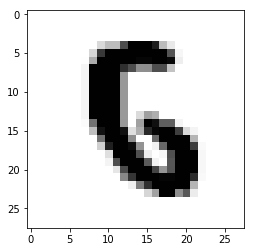

Prediction: 5 Label: 6
------------------------


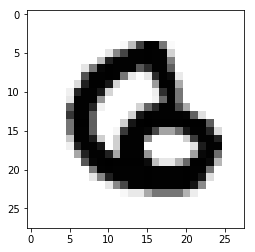

Prediction: 0 Label: 6
------------------------


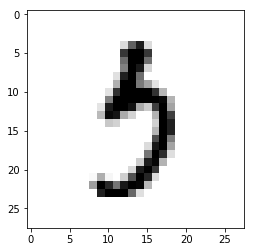

Prediction: 5 Label: 3
------------------------


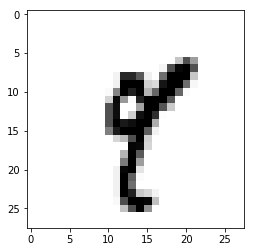

Prediction: 4 Label: 9
------------------------


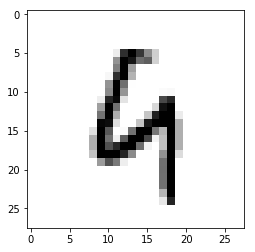

Prediction: 4 Label: 9
------------------------


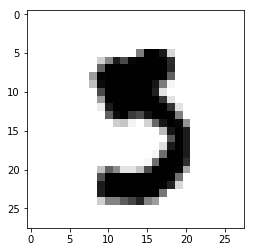

Prediction: 3 Label: 5
------------------------


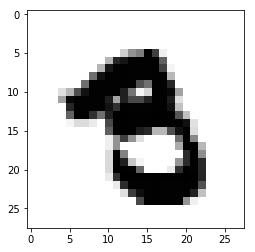

Prediction: 8 Label: 3
------------------------


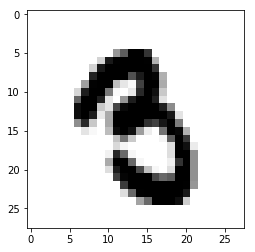

Prediction: 8 Label: 3
------------------------


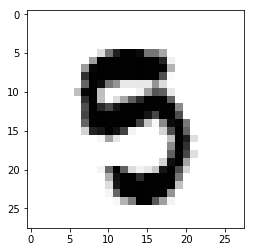

Prediction: 9 Label: 5
------------------------


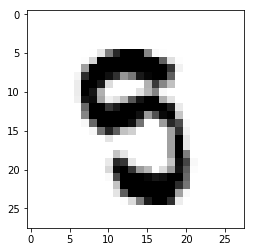

Prediction: 9 Label: 5
------------------------


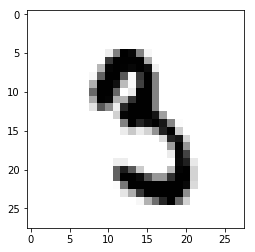

Prediction: 9 Label: 3
------------------------


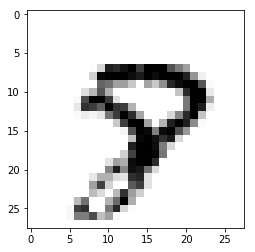

Prediction: 9 Label: 8
------------------------


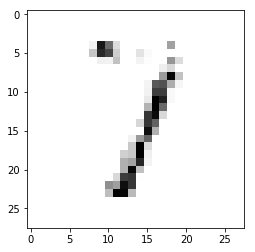

Prediction: 1 Label: 7
------------------------


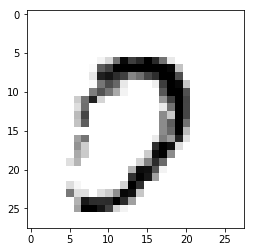

Prediction: 7 Label: 0
------------------------


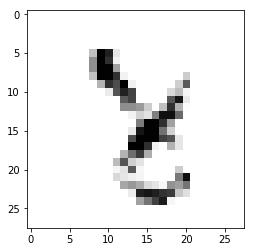

Prediction: 4 Label: 8
------------------------


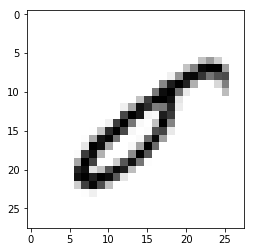

Prediction: 8 Label: 0
------------------------


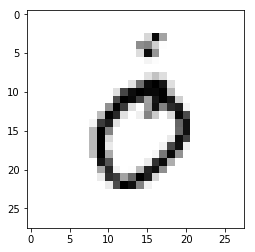

Prediction: 6 Label: 0
------------------------


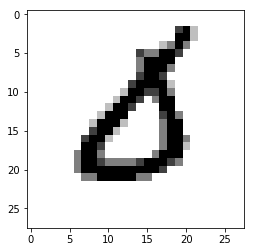

Prediction: 6 Label: 0
------------------------


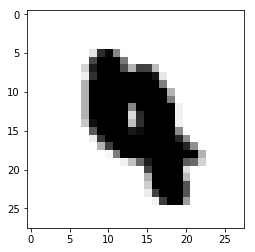

Prediction: 9 Label: 4
------------------------


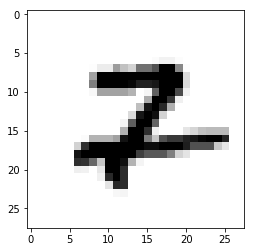

Prediction: 2 Label: 7
------------------------


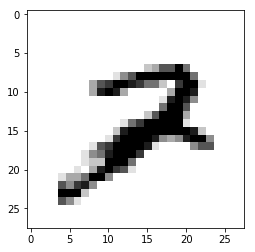

Prediction: 7 Label: 2
------------------------


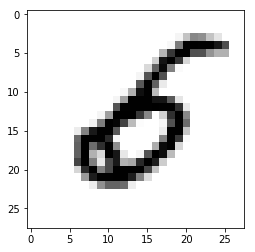

Prediction: 6 Label: 5
------------------------


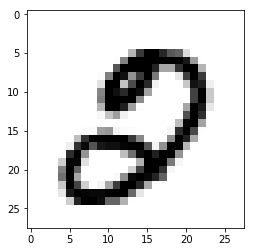

Prediction: 0 Label: 2
------------------------


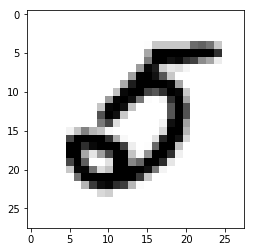

Prediction: 0 Label: 5
------------------------
Correct: 9920 Wrong: 80


In [38]:
counter = 0
count_cor = 0

for k in range (0,len(mnist.test.images[:,:])):

    x_test = mnist.test.images[k,:].reshape(1,28*28)
    y_test = mnist.test.labels[k,:]
    label = y_test.argmax()

    est_value = sess.run(y_conv, feed_dict={x: x_test, keep_prob: 1.0}).argmax()
    
    if (label != est_value):
        counter = counter + 1 
        image = x_test.reshape(28,28)

        plt.imshow(image, cmap=plt.get_cmap('gray_r'))
        plt.show()
        
        print('Prediction: %d Label: %d' % (est_value, label))
        print('------------------------')
    else:
        count_cor = count_cor + 1
        

print('Correct: %d Wrong: %d' % (count_cor, counter))